In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pd.set_option('max_colwidth',20)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',50)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']=(8,5)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'



In [ ]:
Dataset=pd.read_csv("/content/sample_data/transfusion.csv")
Dataset.head()


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [ ]:
Dataset.shape


(748, 5)

In [ ]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [ ]:
Dataset.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

<Axes: >

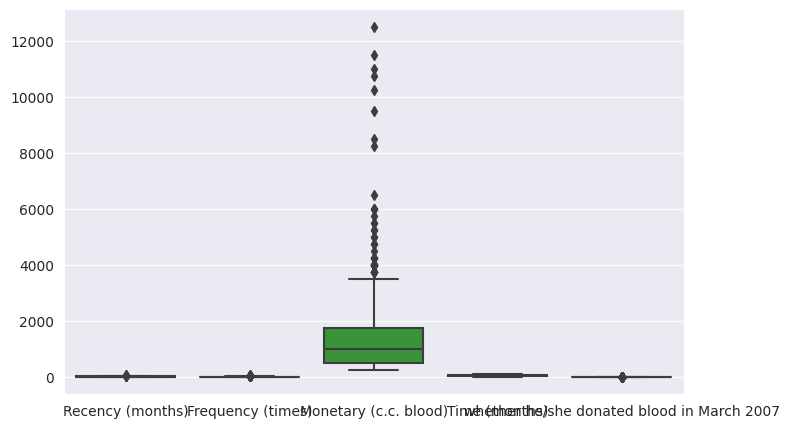

In [ ]:
sns.boxplot(Dataset)

In [ ]:
Dataset.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [ ]:
Q1=Dataset['Monetary (c.c. blood)'].quantile(0.25)
Q3=Dataset['Monetary (c.c. blood)'].quantile(0.75)

IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
Dataset=Dataset[(Dataset['Monetary (c.c. blood)'] >= lower_bound) & (Dataset['Monetary (c.c. blood)'] <= upper_bound)]


In [ ]:
print("Chance of donation where donor is having low recency:",Dataset[Dataset["Recency (months)"]<3]['whether he/she donated blood in March 2007'].mean())
print("Chance of donation where donor is having high recency:",Dataset[Dataset["Recency (months)"]>14]['whether he/she donated blood in March 2007'].mean())
print(".................................................................")
print("Chance of donation where donor is having low recency:",Dataset[Dataset["Recency (months)"]<2]['whether he/she donated blood in March 2007'].mean())
print("Chance of donation where donor is having high recency:",Dataset[Dataset["Recency (months)"]>6]['whether he/she donated blood in March 2007'].mean())
print(".................................................................")
print("Chance of donation where donor is having low recency:",Dataset[Dataset["Recency (months)"]<500]['whether he/she donated blood in March 2007'].mean())
print("Chance of donation where donor is having high recency:",Dataset[Dataset["Recency (months)"]>1500]['whether he/she donated blood in March 2007'].mean())
print(".................................................................")
print("Chance of donation where donor is having low recency:",Dataset[Dataset["Recency (months)"]<14]['whether he/she donated blood in March 2007'].mean())
print("Chance of donation where donor is having high recency:",Dataset[Dataset["Recency (months)"]>46]['whether he/she donated blood in March 2007'].mean())
print(".................................................................")

Chance of donation where donor is having low recency: 0.35260115606936415
Chance of donation where donor is having high recency: 0.07228915662650602
.................................................................
Chance of donation where donor is having low recency: 0.18181818181818182
Chance of donation where donor is having high recency: 0.1095890410958904
.................................................................
Chance of donation where donor is having low recency: 0.22475106685633
Chance of donation where donor is having high recency: nan
.................................................................
Chance of donation where donor is having low recency: 0.2952586206896552
Chance of donation where donor is having high recency: 0.0
.................................................................


In [ ]:
Dataset.describe()


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,703.000000,703.000000,703.000000,703.000000,703.000000
mean,9.645804,4.448080,1112.019915,31.783784,0.224751
std,8.163291,3.391765,847.941140,22.512267,0.417715
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,3.000000,2.000000,500.000000,14.000000,0.000000
50%,9.000000,3.000000,750.000000,26.000000,0.000000
75%,14.000000,6.000000,1500.000000,46.000000,0.000000
max,74.000000,14.000000,3500.000000,98.000000,1.000000


<Axes: xlabel='whether he/she donated blood in March 2007', ylabel='count'>

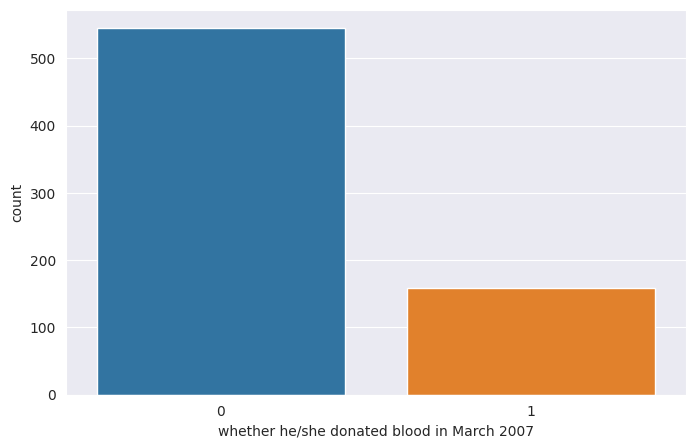

In [ ]:
sns.countplot(x='whether he/she donated blood in March 2007',data=Dataset)

<Axes: xlabel='Monetary (c.c. blood)', ylabel='Time (months)'>

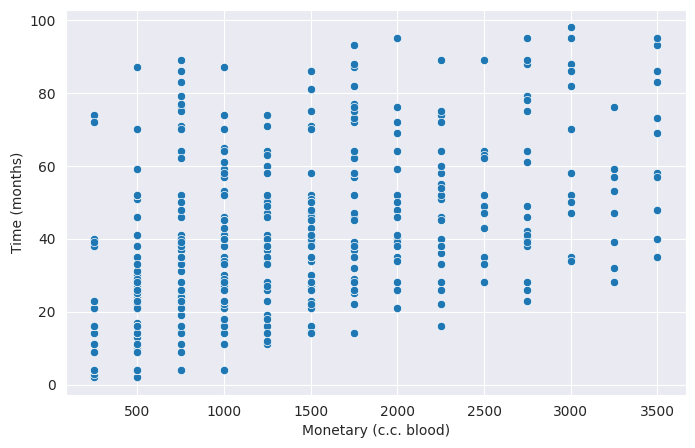

In [ ]:
sns.scatterplot(x=Dataset['Monetary (c.c. blood)'],y=Dataset['Time (months)'])

<Axes: >

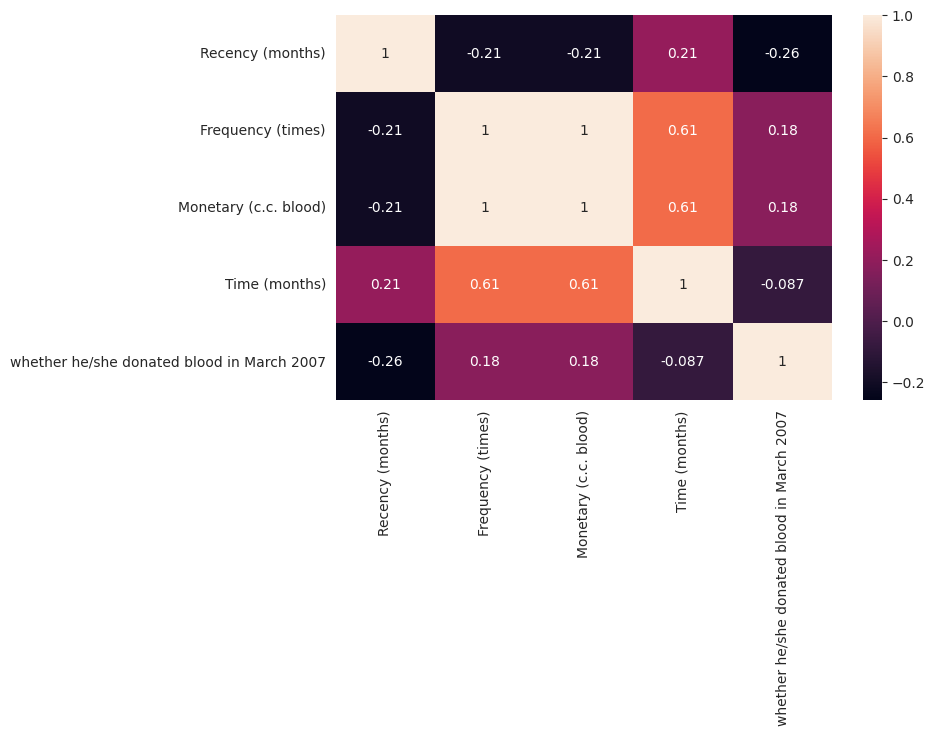

In [ ]:
sns.heatmap(Dataset.corr(),annot=True)

In [ ]:
x=Dataset.drop("whether he/she donated blood in March 2007",axis=1)
y=Dataset["whether he/she donated blood in March 2007"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

LogisticRegression()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

RandomForestClassifier()

In [ ]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)


SVC()

In [ ]:
prediction=logreg.predict((np.array([[24,3,526,28]])))

print("The chance of the donation by a donar for given factor is:",prediction)

The chance of the donation by a donar for given factor is: [0]


In [ ]:
print(accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test,y_pred))

66.66666666666666
              precision    recall  f1-score   support

           0       0.74      0.83      0.79       103
           1       0.32      0.21      0.25        38

    accuracy                           0.67       141
   macro avg       0.53      0.52      0.52       141
weighted avg       0.63      0.67      0.64       141



In [ ]:
print(accuracy_score(y_test,y_pred)*100)

print(classification_report(y_test,y_pred))

66.66666666666666
              precision    recall  f1-score   support

           0       0.74      0.83      0.79       103
           1       0.32      0.21      0.25        38

    accuracy                           0.67       141
   macro avg       0.53      0.52      0.52       141
weighted avg       0.63      0.67      0.64       141



In [ ]:
import pickle
pickle.dump(logreg,open('/content/sample_data/model1.pkl','wb'))